In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings

warnings.filterwarnings('ignore')

df=pd.read_csv('/Users/mubinaarastu/Machine Learning Models/Dataset/amazon_ebook_Data.csv')
df.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_ebook
0,0,"""US""","""33605939""","""RGYFDX8QXKEIR""","""B007KO2MLO""","""328837464""","""Big Maria""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""Quirky""","""Elmore Leonard meets the cast of Sierra Madre...",2013-09-09,positive
1,1,"""US""","""34058393""","""R13CBGTMNV9R8Z""","""B005FLODDE""","""764276359""","""The Woman Who Wasn't There: The True Story of...","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),1 \t(Y),"""The Woman Who Wasn't There""","""This book was very interesting. It is a true ...",2013-09-09,positive
2,2,"""US""","""39601147""","""R7DRFHC0F71O0""","""B00EA3L35O""","""535606445""","""Mary had A Sleepy Sheep""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""This Sleepy Sheep rocks!""","""I had the opportunity to review Mary had a Sl...",2013-09-09,positive
3,3,"""US""","""17351407""","""R27LUKEXU3KBXQ""","""B00BL3JV50""","""240053004""","""Starstruck""","""Digital_Ebook_Purchase""",1,1,1,0 \t(N),1 \t(Y),"""Steamy and suspenseful!!!!!""","""What a great read! I really couldn't put this...",2013-09-09,positive
4,4,"""US""","""10463387""","""R1VXTPUYMNU687""","""B00CXU7U80""","""931529805""","""The Complete Conan Saga""","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),0 \t(N),"""Barbarians""","""Barbarians need love too ! Short stories work...",2013-09-09,positive


In [5]:
df.isnull().sum()

Unnamed: 0           0
market_place         0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
Sentiment_ebook      0
dtype: int64

In [6]:
df.star_rating.unique()

array([1, 0])

In [9]:
df.Sentiment_ebook.unique()

array(['positive', 'negaitve'], dtype=object)

In [13]:
df['PositivelyRated']=np.where(df.Sentiment_ebook=='positive',1,0)

In [14]:
df.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_ebook,PositivelyRated
0,0,"""US""","""33605939""","""RGYFDX8QXKEIR""","""B007KO2MLO""","""328837464""","""Big Maria""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""Quirky""","""Elmore Leonard meets the cast of Sierra Madre...",2013-09-09,positive,1
1,1,"""US""","""34058393""","""R13CBGTMNV9R8Z""","""B005FLODDE""","""764276359""","""The Woman Who Wasn't There: The True Story of...","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),1 \t(Y),"""The Woman Who Wasn't There""","""This book was very interesting. It is a true ...",2013-09-09,positive,1
2,2,"""US""","""39601147""","""R7DRFHC0F71O0""","""B00EA3L35O""","""535606445""","""Mary had A Sleepy Sheep""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""This Sleepy Sheep rocks!""","""I had the opportunity to review Mary had a Sl...",2013-09-09,positive,1
3,3,"""US""","""17351407""","""R27LUKEXU3KBXQ""","""B00BL3JV50""","""240053004""","""Starstruck""","""Digital_Ebook_Purchase""",1,1,1,0 \t(N),1 \t(Y),"""Steamy and suspenseful!!!!!""","""What a great read! I really couldn't put this...",2013-09-09,positive,1
4,4,"""US""","""10463387""","""R1VXTPUYMNU687""","""B00CXU7U80""","""931529805""","""The Complete Conan Saga""","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),0 \t(N),"""Barbarians""","""Barbarians need love too ! Short stories work...",2013-09-09,positive,1


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df['review_body'],df['PositivelyRated'],random_state=0)

In [19]:
xtrain.shape

(75,)

In [20]:
xtest.shape

(25,)

In [28]:
##Count Vectorize
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer().fit(xtrain)
vect

CountVectorizer()

In [31]:
vect.get_feature_names_out()[::30]

array(['10', 'adventure', 'anita', 'auditioning', 'bed', 'both', 'cant',
       'chose', 'completely', 'curriculum', 'depth', 'discover',
       'education', 'erica', 'face', 'figuring', 'friend', 'going',
       'happened', 'hi', 'humor', 'insight', 'job', 'laughed', 'live',
       'man', 'mile', 'near', 'offer', 'oven', 'pertinent', 'previously',
       'quirky', 'reflection', 'rogue', 'sebastian', 'shattered',
       'smiling', 'starts', 'supportive', 'than', 'throws', 'tris', 'up',
       'watch', 'wings', 'year'], dtype=object)

In [32]:
## transform training data to a documnet matrix
x_train_vector=vect.transform(xtrain)
x_train_vector

<75x1389 sparse matrix of type '<class 'numpy.int64'>'
	with 3502 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train_vector,ytrain)

LogisticRegression()

In [35]:
from sklearn.metrics import roc_auc_score
prediction=model.predict(vect.transform(xtest))
print("AUC Score", roc_auc_score(ytest,prediction))


AUC Score 0.7


In [37]:
## get the feature store
features= np.array(vect.get_feature_names_out())

##sort the coeffecients of teh model
sort= model.coef_[0].argsort()
print('smallest coeff: \n{}\n'.format(features[sort[:10]]))
print('largest coeff: \n{}\n'.format(features[sort[:-11:-1]]))

smallest coeff: 
['is' 'what' 'the' 'didn' 'this' 'not' '34' 'us' 'its' 'we']

largest coeff: 
['and' 'read' 'great' 'my' 'his' 'like' 'love' 'that' 'series'
 'characters']



## TFIDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
##let's fit the tfidf vectorixer to the training data specifying a minkimum documnet frequency of 5 
vect= TfidfVectorizer(min_df=5).fit(xtrain)
len(vect.get_feature_names_out())

145

In [41]:
vect.get_feature_names_out()[::30]

array(['about', 'did', 'interesting', 'out', 'times'], dtype=object)

In [42]:
## let's transform training data to a documnet matrix
x_train_vector=vect.transform(xtrain)
x_train_vector

<75x145 sparse matrix of type '<class 'numpy.float64'>'
	with 1805 stored elements in Compressed Sparse Row format>

In [43]:
model= LogisticRegression()
model.fit(x_train_vector,ytrain)

LogisticRegression()

In [44]:
prediction=model.predict(vect.transform(xtest))
print("AUC Score", roc_auc_score(ytest,prediction))

AUC Score 0.5


In [45]:
## get the feature store
features= np.array(vect.get_feature_names_out())

##sort the coeffecients of teh model
sort= model.coef_[0].argsort()
print('smallest coeff: \n{}\n'.format(features[sort[:10]]))
print('largest coeff: \n{}\n'.format(features[sort[:-11:-1]]))

smallest coeff: 
['is' 'the' 'didn' 'not' 'there' 'from' 'but' 'am' 'did' 'what']

largest coeff: 
['read' 'great' 'like' 'and' 'enjoyed' 'love' 'characters' 'reading'
 'their' 'his']



## n-grams

In [47]:
##fit the tfidf vectorixer to the training data specifying a minkimum documnet frequency of 5 
## and extracting 1-grams and 2-grams

vect= TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(xtrain)
x_train_vector= vect.transform(xtrain)
len(vect.get_feature_names_out())

187

In [49]:
## get the feature store
features= np.array(vect.get_feature_names_out())

##sort the coeffecients of teh model
sort= model.coef_[0].argsort()
print('smallest coeff: \n{}\n'.format(features[sort[:10]]))
print('largest coeff: \n{}\n'.format(features[sort[:-11:-1]]))

smallest coeff: 
['have read' 'of this' 'can' 'it would' 'or' 'feel' 'book' 'also' 'by'
 'the first']

largest coeff: 
['love' 'for the' 'his' 'am' 'couldn' 'in the' 'br' 'loved' 'on' 'good']



## Text Classification

In [61]:
df.groupby('PositivelyRated').size()

PositivelyRated
0    18
1    82
dtype: int64

In [62]:
x=df.review_headline
y=df.PositivelyRated


In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [65]:
print("Test has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(xtest),
                                                                                 (len(xtest[ytest==0])/(len(xtest)*1.))*100,
                                                                                   (len(xtest[ytest==1])/(len(xtest)*1.))*100))

Test has total 25 entries with 20.00% negative, 80.00% positive


In [67]:
print("Train has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(xtrain),
                                                                                 (len(xtrain[ytrain==0])/(len(xtrain)*1.))*100,
                                                                                   (len(xtrain[ytrain==1])/(len(xtrain)*1.))*100))

Train has total 75 entries with 17.33% negative, 82.67% positive


In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [121]:
def accuracy_summary(pipeline, xtrain, ytrain, xtest, ytest):
    sentiment_fit = pipeline.fit(xtrain,ytrain)
    ypred = sentiment_fit.predict(xtest)
    accuracy = accuracy_score(ytest,ypred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [122]:
cv=CountVectorizer()
rf=RandomForestClassifier(class_weight="balanced")
n_features=np.arange(90,180,190)
n_gram_range=(1,6)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features,stop_words=None, ngram_range=(1,1),classifier=rf):
    result=[]
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words,max_features=n, ngram_range=ngram_range)
        checker_pipeline=Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
            ])
        print("Test result for {} features".format(n))
        nfeatures_accuracy=accuracy_summary(checker_pipeline, xtrain, ytrain, xtest, ytest)
        result.append((n,nfeatures_accuracy))
    return result

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [124]:
featureresults=nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1,6))

RandomForestClassifier(class_weight='balanced')


Test result for 90 features
accuracy score: 84.00%


In [133]:
from sklearn.metrics import classification_report
cv=CountVectorizer(max_features=100,ngram_range=(1,6))
pipeline=Pipeline([
            ('vectorizer', cv),
            ('classifier', rf)
            ])
sentiment_fit = pipeline.fit(xtrain,ytrain)
ypred = sentiment_fit.predict(xtest)
print(classification_report(ytest,ypred,target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.57      0.80      0.67         5
    positive       0.94      0.85      0.89        20

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25



### Chi2 Features

In [135]:
from sklearn.feature_selection import chi2
tfidf=TfidfVectorizer(max_features=100,ngram_range=(1,6))
xtfidf=tfidf.fit_transform(df.review_headline)
y=df.PositivelyRated
chi2score=chi2(xtfidf,y)[0]


In [136]:
chi2score

array([0.21885419, 0.59468361, 0.55241527, 0.35144802, 0.19204425,
       0.23813847, 0.40280925, 0.1497449 , 0.7579734 , 0.10307718,
       0.20736831, 6.61489099, 0.32070113, 0.18053024, 0.6142272 ,
       1.38753388, 0.33952243, 0.46385951, 0.29784425, 0.89462577,
       0.412832  , 0.18743659, 0.3837399 , 0.34712674, 0.18422451,
       0.18422451, 0.29691305, 0.33211788, 0.56965757, 0.37882528,
       0.24094641, 0.18422451, 0.48332524, 0.38915607, 0.72551391,
       0.351638  , 2.47934211, 1.76532645, 5.17644299, 4.34117632,
       0.31616739, 2.24421026, 0.13154724, 0.13521697, 0.08625679,
       0.08625679, 0.08625679, 0.08625679, 0.08625679, 1.15277793,
       0.09688077, 0.09688077, 0.2195122 , 0.06596068, 1.91078617,
       1.91078617, 1.91078617, 1.91078617, 0.2195122 , 0.2195122 ,
       1.23933189, 0.11809273, 0.11809273, 0.08873117, 0.08873117,
       0.83298753, 2.01472084, 2.01472084, 2.01472084, 0.09688077,
       0.20189483, 0.13730959, 0.13730959, 3.53331779, 0.06596

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores=list(zip(tfidf.get_feature_names_out(),chi2score))
chi2=sorted(scores,key=lambda x:x[1])
topchi2=list(zip(*chi2[-20:]))
topchi2

[('page',
  'read',
  'free',
  'no',
  'pretty',
  'pretty much',
  'pretty much hot',
  'pretty much hot mess',
  'really',
  'really say how',
  'say how to be',
  'of women',
  'you',
  'you can',
  'my',
  'so',
  'shoes',
  'not my',
  'not',
  'didn'),
 (1.1527779297268488,
  1.2393318916663338,
  1.3875338753387534,
  1.7653264523972967,
  1.9107861715349126,
  1.9107861715349126,
  1.9107861715349126,
  1.9107861715349126,
  2.0147208410393125,
  2.0147208410393125,
  2.0147208410393125,
  2.2442102606558008,
  2.3055558594536976,
  2.3055558594536976,
  2.47934211211834,
  2.525962621599855,
  3.533317792019266,
  4.34117632322197,
  5.176442993293725,
  6.614890991870729)]

<Figure size 1200x800 with 0 Axes>

In [146]:
x=range(len(topchi2[0]))
x

range(0, 20)

In [142]:
labels=topchi2[0]
labels

('page',
 'read',
 'free',
 'no',
 'pretty',
 'pretty much',
 'pretty much hot',
 'pretty much hot mess',
 'really',
 'really say how',
 'say how to be',
 'of women',
 'you',
 'you can',
 'my',
 'so',
 'shoes',
 'not my',
 'not',
 'didn')

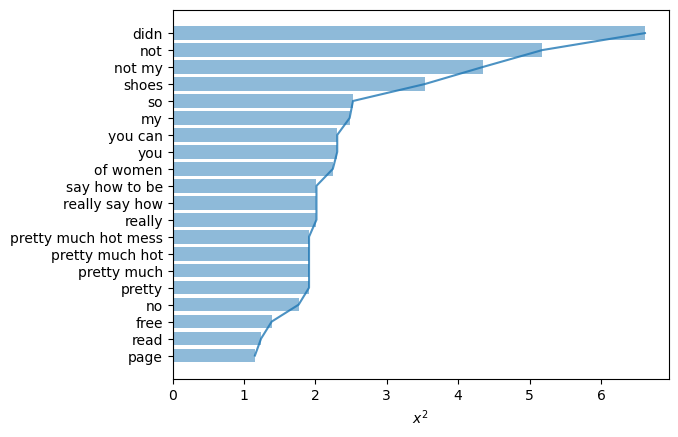

In [159]:
plt.barh(x,topchi2[1],align='center',alpha=0.5)
plt.plot(topchi2[1],x, markersize=5,alpha=0.8)
plt.yticks(x,labels)
plt.xlabel('$x^2$')
plt.show()

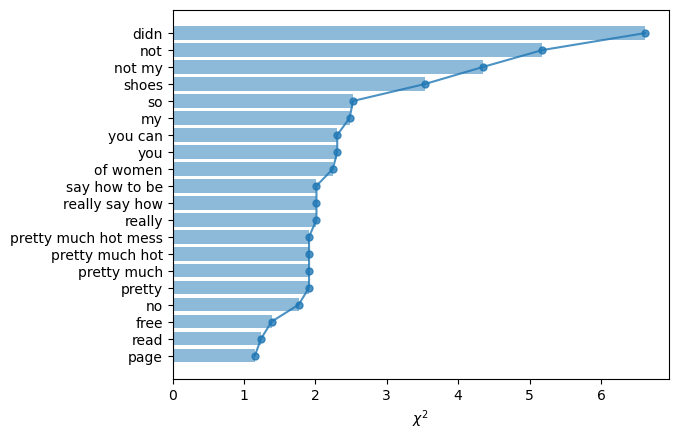

In [157]:
plt.barh(x,topchi2[1],align='center',alpha=0.5)
plt.plot(topchi2[1],x,'-o', markersize=5,alpha=0.8)
plt.yticks(x,labels)
plt.xlabel('$\chi^2$')
plt.show()